## 0 環境構築

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
np.set_printoptions(precision=8)
np.random.seed(123)

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 4.1MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=5207c3e35bf366db543a7790948daad72ad42babf59d32d8bf491173b7d0c1ee
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib
import matplotlib as mpl
font = mpl.rcParams['font.family']
sns.set(context='notebook', style='whitegrid', font=font)

## 1 国内感染者数の推移

In [ ]:
!wget https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv

--2021-06-29 01:25:41--  https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv
Resolving www3.nhk.or.jp (www3.nhk.or.jp)... 104.75.164.200
Connecting to www3.nhk.or.jp (www3.nhk.or.jp)|104.75.164.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15113 (15K) [application/x-excel]
Saving to: ‘nhk_news_covid19_domestic_daily_data.csv’

nhk_news_covid19_do 100%[===================>]  14.76K  --.-KB/s    in 0s      

2021-06-29 01:25:42 (183 MB/s) - ‘nhk_news_covid19_domestic_daily_data.csv’ saved [15113/15113]



In [ ]:
# df_nhk = pd.read_csv("https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv", delimiter=",", header=0, index_col='日付', parse_dates=True)
# df_nhk.head()

In [ ]:
df_nhk = pd.read_csv("nhk_news_covid19_domestic_daily_data.csv", delimiter=",", header=0, index_col='日付', parse_dates=True)
df_nhk.head()

,国内の感染者数_1日ごとの発表数,国内の感染者数_累計,国内の死者数_1日ごとの発表数,国内の死者数_累計
日付,,,,
2020-01-16,1,1,0,0
2020-01-17,0,1,0,0
2020-01-18,0,1,0,0
2020-01-19,0,1,0,0
2020-01-20,0,1,0,0


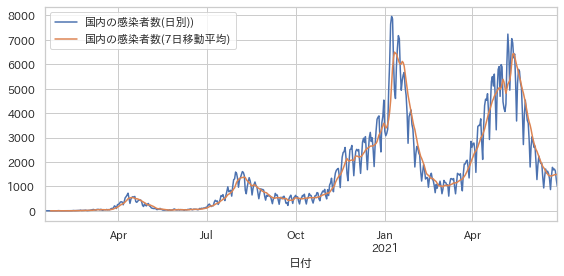

In [ ]:
df_nhk['国内の感染者数_1日ごとの発表数'].plot(figsize=(8, 4), grid=True, legend=True, label="国内の感染者数(日別))")
df_nhk['国内の感染者数_1日ごとの発表数'].rolling(7).mean().plot(figsize=(8, 4), grid=True, legend=True, label="国内の感染者数(7日移動平均)")
plt.tight_layout()

## 2 ダウンロード

In [ ]:
FILE_ID = "112a8wVU22_KoFw2MuMw6CI_IpugDjm8C"
FILE_NAME = "covid19-all.tsv.zip"
!curl -sc ./cookie "https://drive.google.com/uc?export=download&id={FILE_ID}" > /dev/null
CODE = !awk '/_warning_/ {print $NF}' ./cookie
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={CODE[0]}&id={FILE_ID}" -o {FILE_NAME}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1736      0 --:--:-- --:--:-- --:--:--  1736
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 42.4M    0 42.4M    0     0  14.3M      0 --:--:--  0:00:02 --:--:-- 51.4M


In [ ]:
!unzip covid19-all.tsv.zip
!wc -l *.tsv

Archive:  covid19-all.tsv.zip
  inflating: covid19-all.tsv         
346733 covid19-all.tsv


In [ ]:
!head -n 5 covid19-all.tsv

tweet_id	timestamp	text	favorite	retweet	lang	user_id	follower	following	tweets	period1	period2
1253491152474365954	2020-04-24 10:09:14	新型コロナ の影響による 登園自粛 や 保育料免除、市立幼稚園の 臨時休園 などについて順次お知らせしています。 保育料の手続きは施設により異なります。ご確認ください。 浜松市 ぴっぴ コロナに負けない	5	2	ja	248479481	1291	624	6179	1度目の緊急事態宣言-中	第1波-中
1253492050734936064	2020-04-24 10:12:48	マスク 新型コロナ 非常事態宣言 マスクが徐々に市場に溢れている。今の価格は、1枚あたり50〜80円くらい。マスク買い占めていた外国人が本国で売れなくなって在庫処分してる。病院にも徐々に入荷されている。マスク買おうとして…	11	2	ja	1231428276301615105	415	463	156	1度目の緊急事態宣言-中	第1波-中
1253493010395852801	2020-04-24 10:16:37	新型コロナ 佐賀県内初の クラスター 発生 武雄のクラブ、新たに７人感染。職員も感染 嬉野医療センター 外来休止。あちこちで病院関係者の感染が確認され診療に大きな影響が出てい…	1	1	ja	1236199843497820160	93	405	1694	1度目の緊急事態宣言-中	第1波-中
1253493727210815489	2020-04-24 10:19:28	東京都はスーパーや商店街の混雑緩和のためとして、買い物を3日に一度にするように呼びかけました。 東京新聞:＜ 新型コロナ＞買い物「３日に一度に」 都知事、混雑緩和へ具体策:社会(TOKYO Web)	0	0	ja	925573152792440832	2235	166	3137	1度目の緊急事態宣言-中	第1波-中


In [ ]:
df_all = pd.read_csv("covid19-all.tsv", sep='\t', quoting=3, escapechar='\\')
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_all['index'] = df_all.index
df_all.set_index('timestamp', inplace=True)
df_all = df_all.tz_localize('Asia/Tokyo')
print(df_all.shape)
df_all.head()

(346732, 12)


,tweet_id,text,favorite,retweet,lang,user_id,follower,following,tweets,period1,period2,index
timestamp,,,,,,,,,,,,
2020-04-24 10:09:14+09:00,1253491152474365954,新型コロナ の影響による 登園自粛 や 保育料免除、市立幼稚園の 臨時休園 などについて順次...,5,2,ja,248479481,1291,624,6179,1度目の緊急事態宣言-中,第1波-中,0
2020-04-24 10:12:48+09:00,1253492050734936064,マスク 新型コロナ 非常事態宣言 マスクが徐々に市場に溢れている。今の価格は、1枚あたり50...,11,2,ja,1231428276301615105,415,463,156,1度目の緊急事態宣言-中,第1波-中,1
2020-04-24 10:16:37+09:00,1253493010395852801,新型コロナ 佐賀県内初の クラスター 発生 武雄のクラブ、新たに７人感染。職員も感染 嬉野医...,1,1,ja,1236199843497820160,93,405,1694,1度目の緊急事態宣言-中,第1波-中,2
2020-04-24 10:19:28+09:00,1253493727210815489,東京都はスーパーや商店街の混雑緩和のためとして、買い物を3日に一度にするように呼びかけました...,0,0,ja,925573152792440832,2235,166,3137,1度目の緊急事態宣言-中,第1波-中,3
2020-04-24 10:22:11+09:00,1253494414518874112,厚生労働省から4月22日付けで、通院・在宅精神療法を算定している患者さんに対して電話で指導し...,0,0,ja,176644442,466,165,2829,1度目の緊急事態宣言-中,第1波-中,4


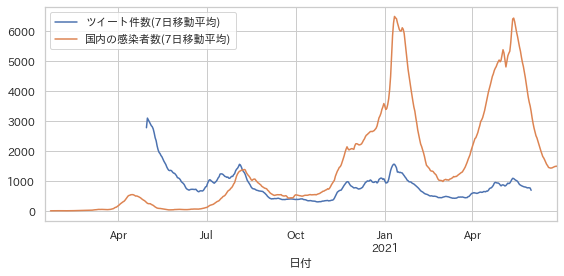

In [ ]:
df_all['lang'].resample('D').count().rolling(7).mean().plot(figsize=(8, 4), grid=True, legend=True, label="ツイート件数(7日移動平均)")
df_nhk['国内の感染者数_1日ごとの発表数'].rolling(7).mean().plot(figsize=(8, 4), grid=True, legend=True, label='国内の感染者数(7日移動平均)')
plt.tight_layout()

## 3 ツイート "#新型コロナ" のテキスト分析

### 3.1 MeCab + neologd インストール

In [ ]:
!apt install mecab libmecab-dev file
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n
!cp /etc/mecabrc /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd/mecabrc
!pip install fugashi ipadic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1 libmecab2 mecab-jumandic mecab-jumandic-utf8
  mecab-utils
The following NEW packages will be installed:
  file libmagic-mgc libmagic1 libmecab-dev libmecab2 mecab mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 9 newly installed, 0 to remove and 39 not upgraded.
Need to get 17.1 MB of archives.
After this operation, 227 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 file amd64 1:5.32-2ubuntu0.4 [22.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:5 http://archive.ubuntu.co

In [ ]:
import os, subprocess, ipadic
cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path_neologd = (subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True).communicate()[0]).decode('utf-8').strip()
ipadic.DICDIR = path_neologd
ipadic.MECAB_ARGS = '-r "{}" -d "{}"'.format(os.path.join(ipadic.DICDIR, 'mecabrc'), ipadic.DICDIR)
print(ipadic.MECAB_ARGS)

-r "/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd/mecabrc" -d "/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd"


In [ ]:
from fugashi import GenericTagger
import ipadic

# m = GenericTagger(ipadic.MECAB_ARGS + " " + "-Owakati")
# m = GenericTagger(ipadic.MECAB_ARGS + " " + '--node-format="%pS%f[6]\\s" --eos-format="\\n" --unk-format="%m"')
m = GenericTagger(ipadic.MECAB_ARGS)

text = "私はフック船長が好きです。親がコロナになる。"

for word in m.parseToNodeList(text):
    print(word.surface, word.feature)

私 ('名詞', '代名詞', '一般', '*', '*', '*', '私', 'ワタシ', 'ワタシ')
は ('助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ')
フック船長 ('名詞', '固有名詞', '人名', '一般', '*', '*', 'フック船長', 'フックセンチョウ', 'フックセンチョー')
が ('助詞', '格助詞', '一般', '*', '*', '*', 'が', 'ガ', 'ガ')
好き ('名詞', '形容動詞語幹', '*', '*', '*', '*', '好き', 'スキ', 'スキ')
です ('助動詞', '*', '*', '*', '特殊・デス', '基本形', 'です', 'デス', 'デス')
。 ('記号', '句点', '*', '*', '*', '*', '。', '。', '。')
親 ('名詞', '一般', '*', '*', '*', '*', '親', 'オヤ', 'オヤ')
が ('助詞', '格助詞', '一般', '*', '*', '*', 'が', 'ガ', 'ガ')
コロナ ('名詞', '一般', '*', '*', '*', '*', 'コロナ', 'コロナ', 'コロナ')
に ('助詞', '格助詞', '一般', '*', '*', '*', 'に', 'ニ', 'ニ')
なる ('動詞', '自立', '*', '*', '五段・ラ行', '基本形', 'なる', 'ナル', 'ナル')
。 ('記号', '句点', '*', '*', '*', '*', '。', '。', '。')


In [ ]:
m = GenericTagger(ipadic.MECAB_ARGS)

# def mecab_tokenizer(text):
#     return m.parse(text)

def mecab_tokenizer(text):
    ret = []
    for word in m.parseToNodeList(text):
        # 品詞を選択する
        if word.feature[0] not in ['名詞','動詞','形容詞','副詞','形容動詞','未知語']:
            continue
        # 不要語を除去する
        if word.feature[0] == '名詞' and word.feature[1] == '非自立':  # 'よう'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '非自立':  # 'いる'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '接尾':    # 'られる'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '自立' and word.feature[6] in ['ある','する']:
            continue
        ret.append(word.feature[6])
    return ' '.join(ret)

In [ ]:
" ".join(df_all['text'][0:100].map(mecab_tokenizer))

'新型コロナ 影響 登 園 自粛 保育 料 免除 市立 幼稚園 臨時休園 順次 お知らせ 保育 料 手続き 施設 異なる 確認 浜松市 ぴっ * コロナに負けない マスク 新型コロナ 非常事態宣言 マスク 徐々に 市場 溢れる 今 価格 1枚 あたり * 80円 マスク 買い占める 外国人 本国 売れる なる 在庫処分 病院 徐々に 入荷 マスク 買う 新型コロナ 佐賀県内 初 CLUSTER 発生 武雄 クラブ 新た ７ 人 感染 職員 感染 嬉野医療センター 外来 休止 あちこち 病院 関係 者 感染 確認 診療 影響 出る 東京都 スーパー 商店 街 混雑 緩和 買い物 3日 一 度 呼びかける 東京新聞 新型コロナ 買い物 ３ 日 一 度 都知事 混雑 緩和 具体策 社会 TOKYO Web 厚生労働省 4月22日 付け 通院 在宅 精神療法 算定 患者 さん 電話 指導 場合 147点 月 １ 回 算定 できる 通知 出す 今 管理 料 関係 算定 できる 新型コロナ 診療報酬 昨日 船橋 感染 確認 数 * 例 なる ９ 割 軽症 症状 詳細 こちら もう 細か 個人情報 クラスター 発生 場合 具体 的 事例 開示 予防 重要 段階 思う 新型コロナ 船橋 新型コロナ モーニングショー あさイチ アベノマスク 人工呼吸器 * 億 円 ワクチン * 億 円 政策 能力 ０ Go * キャンペーン * 兆 * 千 億 円 非難 殺到 星浩 正気 官邸 異常 楽観 論 田崎史郎 新型コロナ ワクチン ニューヨーク 交代 保有 率 ものすごい 高い さすが おかしい クルーズ船 症候 者 割合 考える もしか 通常 コロナ 抗体 交差抗原性 模試 そうだ 通常 コロナ ワクチン 使える 希望的観測 新型コロナ 山梨県知事 給与 1円 5月 分 ほぼ 全額 返上 ４ ２ ４ 新型コロナ 山梨県知事 山梨 知事 拡散 愛知 名古屋駅 前 人 いる 武漢肺炎 新型コロナ 自粛 民度 検査 実施 目標 4割 保健所 負担 減 保健所 通す 検査 受ける * 根本的 誤り 厚生労働省 正す マスク 役人 常に 自分 判断 正しい 思う 人達 多い 認める * 岡江久美子 さん 追悼 tweet 三原じゅん子 議員 中傷 投稿 新型コロナ マスク 三原じゅん子 急ぐ 必要

In [ ]:
df_all['mecab'] = df_all['text'].map(mecab_tokenizer)
df_all['length'] = df_all['mecab'].map(lambda x: x.split()).map(len)
print(df_all.shape)
df_all.head()

(346732, 14)


,tweet_id,text,favorite,retweet,lang,user_id,follower,following,tweets,period1,period2,index,mecab,length
timestamp,,,,,,,,,,,,,,
2020-04-24 10:09:14+09:00,1253491152474365954,新型コロナ の影響による 登園自粛 や 保育料免除、市立幼稚園の 臨時休園 などについて順次...,5,2,ja,248479481,1291,624,6179,1度目の緊急事態宣言-中,第1波-中,0,新型コロナ 影響 登 園 自粛 保育 料 免除 市立 幼稚園 臨時休園 順次 お知らせ 保育...,23
2020-04-24 10:12:48+09:00,1253492050734936064,マスク 新型コロナ 非常事態宣言 マスクが徐々に市場に溢れている。今の価格は、1枚あたり50...,11,2,ja,1231428276301615105,415,463,156,1度目の緊急事態宣言-中,第1波-中,1,マスク 新型コロナ 非常事態宣言 マスク 徐々に 市場 溢れる 今 価格 1枚 あたり * ...,25
2020-04-24 10:16:37+09:00,1253493010395852801,新型コロナ 佐賀県内初の クラスター 発生 武雄のクラブ、新たに７人感染。職員も感染 嬉野医...,1,1,ja,1236199843497820160,93,405,1694,1度目の緊急事態宣言-中,第1波-中,2,新型コロナ 佐賀県内 初 CLUSTER 発生 武雄 クラブ 新た ７ 人 感染 職員 感染...,25
2020-04-24 10:19:28+09:00,1253493727210815489,東京都はスーパーや商店街の混雑緩和のためとして、買い物を3日に一度にするように呼びかけました...,0,0,ja,925573152792440832,2235,166,3137,1度目の緊急事態宣言-中,第1波-中,3,東京都 スーパー 商店 街 混雑 緩和 買い物 3日 一 度 呼びかける 東京新聞 新型コロ...,25
2020-04-24 10:22:11+09:00,1253494414518874112,厚生労働省から4月22日付けで、通院・在宅精神療法を算定している患者さんに対して電話で指導し...,0,0,ja,176644442,466,165,2829,1度目の緊急事態宣言-中,第1波-中,4,厚生労働省 4月22日 付け 通院 在宅 精神療法 算定 患者 さん 電話 指導 場合 14...,28


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(max_df=0.5, min_df=1, max_features=500)
bag = count.fit_transform(df_all['mecab'].values)
feature_names = count.get_feature_names()
feature_names[0:10]

['100人', '19', '1人', '1日', '2020年', '2021年', '2人', '2週間', '3人', '4人']

In [ ]:
tf = bag.toarray().sum(axis=0)
for i in tf.argsort()[:-10:-1]:
    print(tf[i], "\t", count.get_feature_names()[i])

101255 	 感染
81651 	 コロナ
53039 	 なる
47839 	 新型コロナウイルス
35334 	 ワクチン
32276 	 確認
31340 	 ない
31242 	 マスク
30589 	 緊急事態宣言


In [ ]:
df_count = pd.DataFrame(bag.toarray())
df_count.columns = feature_names
print(df_count.shape)
df_count.head()

(346732, 500)


,100人,19,1人,1日,2020年,2021年,2人,2週間,3人,4人,4月,5人,5月,blog,cluster,covid,google,gt,gw,mmt,news,nhk,pcr,pcr検査,tokyo,tweet,web,who,yahoo,あたり,あと,いい,いう,いつ,いる,うち,お願い,かかる,かなり,ここ,...,販売,責任,起きる,超える,軽症,退院,速報,連続,週間,遅い,過ごす,過去,過去最多,違う,避ける,都内,都道府県,重症,重要,開催,開始,開発,関係,関連,防止,陰性,陽性,隔離,電子版,静岡県,韓国,頑張る,風邪,飲む,飲食,飲食店,首相,首都圏,高い,高齢者
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


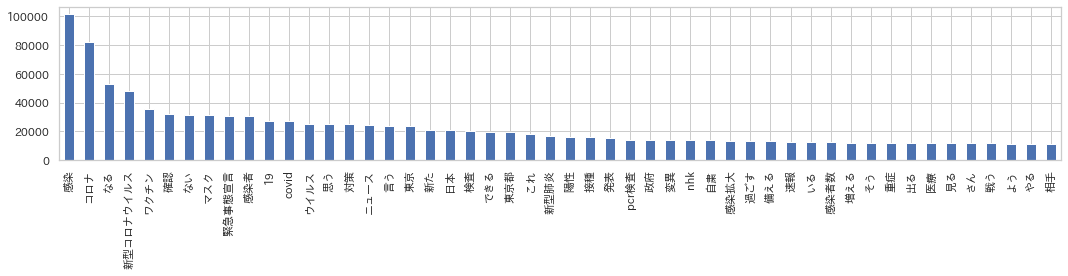

In [ ]:
df_count.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(figsize=(15, 4), grid=True)
plt.tight_layout()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tfidf = tfidf_vectorizer.fit_transform(bag)

In [ ]:
df_tfidf = pd.DataFrame(tfidf.toarray())
df_tfidf.columns = feature_names
print(df_tfidf.shape)
df_tfidf.head()

(346732, 500)


,100人,19,1人,1日,2020年,2021年,2人,2週間,3人,4人,4月,5人,5月,blog,cluster,covid,google,gt,gw,mmt,news,nhk,pcr,pcr検査,tokyo,tweet,web,who,yahoo,あたり,あと,いい,いう,いつ,いる,うち,お願い,かかる,かなり,ここ,...,販売,責任,起きる,超える,軽症,退院,速報,連続,週間,遅い,過ごす,過去,過去最多,違う,避ける,都内,都道府県,重症,重要,開催,開始,開発,関係,関連,防止,陰性,陽性,隔離,電子版,静岡県,韓国,頑張る,風邪,飲む,飲食,飲食店,首相,首都圏,高い,高齢者
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.339895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.336075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349765,0.0,0.334088,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.2 可視化

#### Word Cloud

In [ ]:
topic = bag.toarray().sum(axis=0)
for i in topic.argsort()[:-10:-1]:
    print(topic[i], "\t", feature_names[i])

101255 	 感染
81651 	 コロナ
53039 	 なる
47839 	 新型コロナウイルス
35334 	 ワクチン
32276 	 確認
31340 	 ない
31242 	 マスク
30589 	 緊急事態宣言


In [ ]:
topic = tfidf.toarray().sum(axis=0)
for i in topic.argsort()[:-10:-1]:
    print(topic[i], "\t", feature_names[i])

16894.95574663396 	 感染
15248.659849268688 	 コロナ
10857.91943503523 	 なる
10256.338938885476 	 新型コロナウイルス
8597.578557299716 	 ワクチン
7849.64320384818 	 マスク
7608.672284417698 	 緊急事態宣言
7507.187098784295 	 確認
7366.650282435216 	 ない


In [ ]:
font_path = !find / -name "*.ttf" 2> /dev/null | grep -s "ipaexg.ttf" | head -n 1
font_path

['/usr/local/lib/python3.7/dist-packages/japanize_matplotlib/fonts/ipaexg.ttf']

感染,コロナ,なる,新型コロナウイルス,ワクチン,マスク,緊急事態宣言,確認,ない,感染者,19,covid,対策,ニュース,東京,思う,ウイルス,言う,日本,新た


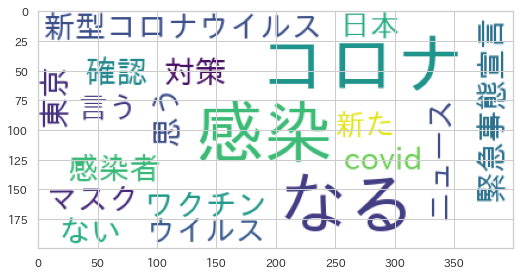

In [ ]:
from wordcloud import WordCloud

fig = plt.figure(figsize=(8,4))
words = count.get_feature_names()
n_top_words = 20

long_string = ','.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
print(long_string)

wordcloud = WordCloud(font_path=font_path[0], background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
plt.imshow(wordcloud)

plt.tight_layout()

#### 対応分析

In [ ]:
df_all[['index', 'period1', 'period2']].head()

,index,period1,period2
timestamp,,,
2020-04-24 10:09:14+09:00,0,1度目の緊急事態宣言-中,第1波-中
2020-04-24 10:12:48+09:00,1,1度目の緊急事態宣言-中,第1波-中
2020-04-24 10:16:37+09:00,2,1度目の緊急事態宣言-中,第1波-中
2020-04-24 10:19:28+09:00,3,1度目の緊急事態宣言-中,第1波-中
2020-04-24 10:22:11+09:00,4,1度目の緊急事態宣言-中,第1波-中


In [ ]:
df_merge = pd.merge(df_all[['index', 'period2']], df_count, left_on='index', how='inner', right_index=True)
print(df_merge.shape)
df_merge.head()

(346732, 502)


,index,period2,100人,19,1人,1日,2020年,2021年,2人,2週間,3人,4人,4月,5人,5月,blog,cluster,covid,google,gt,gw,mmt,news,nhk,pcr,pcr検査,tokyo,tweet,web,who,yahoo,あたり,あと,いい,いう,いつ,いる,うち,お願い,かかる,...,販売,責任,起きる,超える,軽症,退院,速報,連続,週間,遅い,過ごす,過去,過去最多,違う,避ける,都内,都道府県,重症,重要,開催,開始,開発,関係,関連,防止,陰性,陽性,隔離,電子版,静岡県,韓国,頑張る,風邪,飲む,飲食,飲食店,首相,首都圏,高い,高齢者
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-24 10:09:14+09:00,0,第1波-中,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-04-24 10:12:48+09:00,1,第1波-中,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-04-24 10:16:37+09:00,2,第1波-中,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-04-24 10:19:28+09:00,3,第1波-中,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-04-24 10:22:11+09:00,4,第1波-中,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_period2 = df_merge.groupby(["period2"]).sum()
df_period2.drop('index', axis=1, inplace=True)
df_period2.head()

,100人,19,1人,1日,2020年,2021年,2人,2週間,3人,4人,4月,5人,5月,blog,cluster,covid,google,gt,gw,mmt,news,nhk,pcr,pcr検査,tokyo,tweet,web,who,yahoo,あたり,あと,いい,いう,いつ,いる,うち,お願い,かかる,かなり,ここ,...,販売,責任,起きる,超える,軽症,退院,速報,連続,週間,遅い,過ごす,過去,過去最多,違う,避ける,都内,都道府県,重症,重要,開催,開始,開発,関係,関連,防止,陰性,陽性,隔離,電子版,静岡県,韓国,頑張る,風邪,飲む,飲食,飲食店,首相,首都圏,高い,高齢者
period2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
第1波-中,114,1204,161,116,258,15,71,129,47,30,209,27,245,117,226,1199,18,79,556,123,98,425,178,875,64,139,106,288,200,66,168,874,377,173,1229,296,342,269,143,214,...,219,157,158,142,242,165,204,80,285,143,553,69,13,214,135,163,111,295,141,133,187,142,263,223,256,161,649,133,107,71,177,316,89,89,59,163,139,29,267,120
第1波-後,286,5904,977,641,1527,90,469,383,405,267,721,402,1195,537,1238,5893,1094,372,709,953,549,1919,594,3145,258,397,388,1038,1549,424,635,2567,1408,586,3216,659,840,755,501,953,...,943,675,613,828,404,642,1061,864,565,479,2722,329,83,753,550,622,538,898,454,690,881,813,950,1000,1136,649,2296,558,762,162,1262,1005,582,303,290,787,598,319,913,468
第2波-中,1292,4975,1612,1132,2307,54,1196,355,786,619,404,660,249,419,1936,4972,377,565,36,449,645,3154,553,2893,209,364,370,563,771,370,526,1819,1119,417,2181,394,587,657,353,673,...,203,583,478,1610,716,373,1786,1144,335,313,2629,292,1247,695,441,839,442,2607,370,644,477,574,749,796,1189,750,3445,685,262,432,362,406,994,274,285,863,326,342,701,760
第2波-後,251,2671,882,361,784,38,643,120,439,373,86,277,70,232,868,2668,29,198,7,43,307,1017,228,815,127,100,197,227,260,124,150,426,370,145,520,160,165,200,101,203,...,132,121,137,371,152,220,613,384,181,40,1790,88,170,162,166,247,162,692,113,318,198,288,268,379,351,315,1387,180,127,112,121,96,333,54,167,418,98,104,268,265
第3波-中,749,7536,2409,1685,2028,1516,1429,501,1103,932,368,986,220,617,3586,7522,313,1085,37,643,1338,4412,885,4634,790,558,880,969,2137,774,819,2766,1754,638,3450,584,1185,982,551,1020,...,294,832,704,2477,680,446,4576,1619,878,719,3166,768,3685,942,583,860,573,4750,969,1276,817,704,1385,1743,1434,847,5211,871,276,866,707,749,1290,545,1215,2586,914,662,1251,1522


In [ ]:
!pip install mca

  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6025 sha256=5d13c9ffdb58246b398b5345b507b078ccbf90314caac6573a9eaf24b5df8cca
  Stored in directory: /root/.cache/pip/wheels/01/fb/ff/19d72d65c8bb01d4af40c9c2ca20fd267d1969b3b5f8dd60d6
Successfully built mca


In [ ]:
import mca
ncols = df_period2.shape[1]
mca_ben = mca.MCA(df_period2, ncols=ncols, benzecri=False)
mca_ben.fs_r(N=2)

array([[-0.33297468,  0.25487869],
       [-0.30896624,  0.19037747],
       [-0.1220488 , -0.22503402],
       [-0.04479426, -0.24885035],
       [ 0.08555161, -0.08445917],
       [ 0.2705966 ,  0.04933298],
       [ 0.45263525,  0.17763984]])

In [ ]:
result_row = pd.DataFrame(mca_ben.fs_r(N=2))
result_row.index = list(df_period2.index)
result_row

,0,1
第1波-中,-0.332975,0.254879
第1波-後,-0.308966,0.190377
第2波-中,-0.122049,-0.225034
第2波-後,-0.044794,-0.248850
第3波-中,0.085552,-0.084459
第3波-後,0.270597,0.049333
第4波-中,0.452635,0.177640


In [ ]:
result_col = pd.DataFrame(mca_ben.fs_c(N=2))
result_col.index = list(df_period2.columns)
result_col

,0,1
100人,-0.036997,-0.463937
19,-0.045020,-0.058408
1人,0.169645,-0.219524
1日,0.120058,-0.219262
2020年,-0.343803,-0.400629
...,...,...
飲食店,0.272706,-0.081882
首相,-0.038599,0.080114
首都圏,0.184004,-0.083373
高い,-0.068382,0.020332


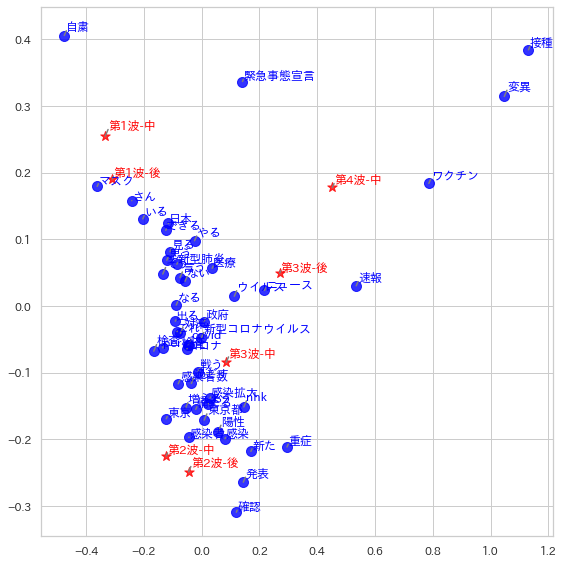

In [ ]:
import random

plt.figure(figsize=(8,8))

tf = bag.toarray().sum(axis=0)
top_tf = tf.argsort()[:-50:-1]

# 表頭
plt.scatter(result_col.iloc[top_tf, 0], result_col.iloc[top_tf, 1], s=100, marker="o", c="blue", alpha=0.8)
for i in top_tf:
    r = random.random() * 0.01
    plt.text(result_col.iloc[i, 0]+r, result_col.iloc[i, 1]+r, result_col.index[i], c="blue")
    plt.plot([result_col.iloc[i, 0]+r, result_col.iloc[i, 0]], [result_col.iloc[i, 1]+r, result_col.iloc[i, 1]], c="gray")

# 表側
plt.scatter(result_row[0], result_row[1], s=100, marker="*", c="red", alpha=0.8)
for i in range(result_row.shape[0]):
    r = random.random() * 0.01
    plt.text(result_row.iloc[i, 0]+r, result_row.iloc[i, 1]+r, result_row.index[i], c="red")
    plt.plot([result_row.iloc[i, 0]+r, result_row.iloc[i, 0]], [result_row.iloc[i, 1]+r, result_row.iloc[i, 1]], c="gray")

plt.tight_layout()

#### 共起ネットワーク

In [ ]:
n_top_words = 50
top_tf = tf.argsort()[:-n_top_words:-1]
top_tf

array([273,  92,  59, 306, 114, 402,  57, 107, 427, 279,   1,  15,  87,
       263, 245, 105, 451, 337, 303, 315, 342,  54, 341,  41, 308, 486,
       292, 389,  23, 297, 221,  21, 438, 276, 470, 154, 466,  34, 280,
       218,  49, 477, 171, 183, 449,  44, 282,  76,  74])

In [ ]:
df_nodes = pd.DataFrame({'label': [feature_names[i] for i in top_tf], 'freq': tf[top_tf]})
df_nodes.head()

,label,freq
0,感染,101255
1,コロナ,81651
2,なる,53039
3,新型コロナウイルス,47839
4,ワクチン,35334


In [ ]:
from itertools import combinations
pairs = list(combinations(top_tf, 2))

min_col = 1000
left, right, freq = [], [], []
for p in pairs:
    df = df_count[(df_count.iloc[:, list(p)] > 0).all(axis=1)].shape[0]
    if df > min_col:
        left.append(feature_names[p[0]])    
        right.append(feature_names[p[1]])
        freq.append(df)

df_edges = pd.DataFrame({'left': left, 'right': right, 'freq': freq})
df_edges.head()

,left,right,freq
0,感染,コロナ,20488
1,感染,なる,9059
2,感染,新型コロナウイルス,22623
3,感染,ワクチン,2659
4,感染,確認,20164


Louvain Modularity:  0.25964205184666866


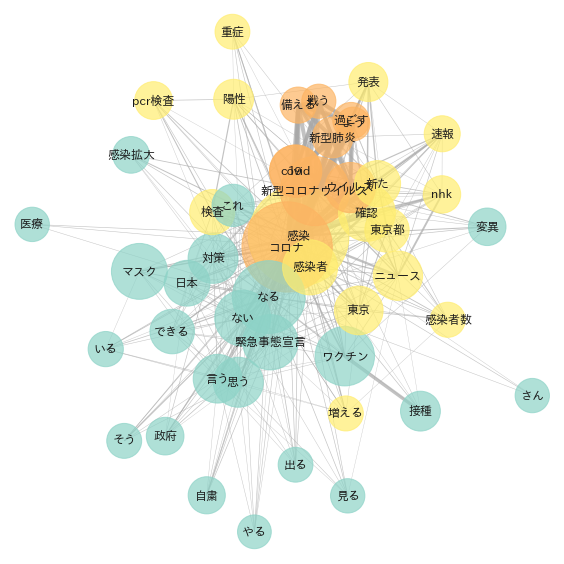

In [ ]:
import networkx as nx
import community

G = nx.Graph()
G.add_nodes_from(df_nodes['label'])
G.add_weighted_edges_from(df_edges.values)

plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k=0.5)
part = community.best_partition(G)
print("Louvain Modularity: ", community.modularity(part, G))
size = float(len(set(part.values())))

# 孤立した node を削除
isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]
for n in isolated:
    G.remove_node(n)

node_size = df_nodes['freq'] / 10
node_class = [part.get(node) for node in G.nodes()]
edge_width = [d["weight"] / 3000 for (u, v, d) in G.edges(data=True)]

nx.draw_networkx_nodes(G, pos, alpha=0.7, cmap=plt.get_cmap("Set3_r"), node_size=node_size, node_color=node_class)
nx.draw_networkx_edges(G, pos, alpha=0.7, edge_color="darkgrey", width=edge_width)
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', font_weight="bold")

plt.axis('off')
plt.tight_layout()

In [ ]:
(node_size.shape)

(49,)

### 3.3 波ごとの分析

#### 頻出語リスト

In [ ]:
df_count_1 = df_count.iloc[df_all[df_all['period2'] == "第1波-中"]['index']]
df_count_2 = df_count.iloc[df_all[df_all['period2'] == "第2波-中"]['index']]
df_count_3 = df_count.iloc[df_all[df_all['period2'] == "第3波-中"]['index']]
df_count_4 = df_count.iloc[df_all[df_all['period2'] == "第4波-中"]['index']]

dc_list = [df_count_1, df_count_2, df_count_3, df_count_4]

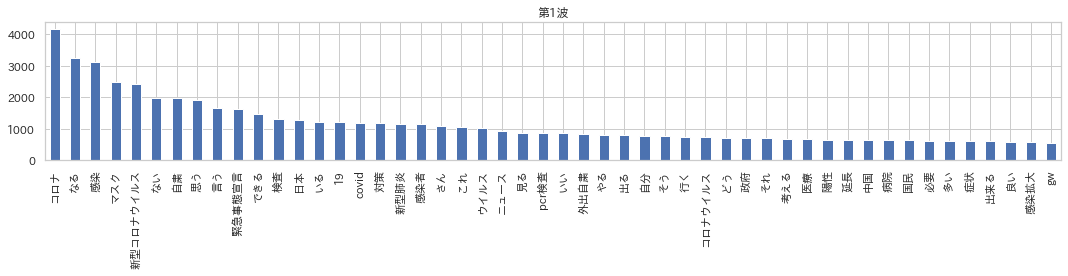

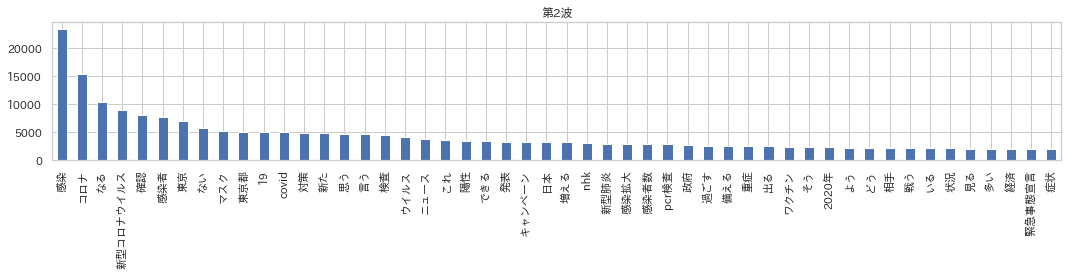

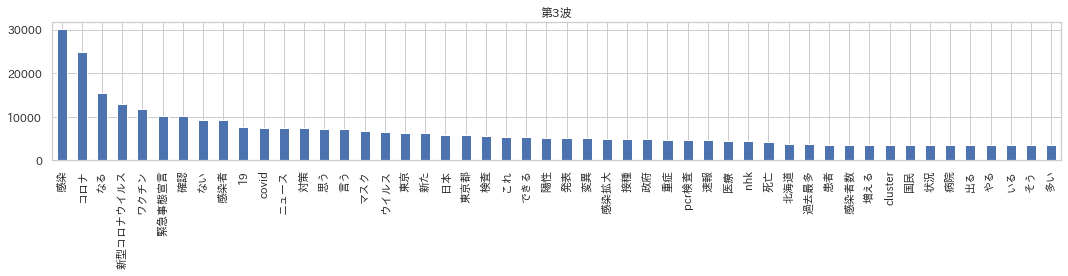

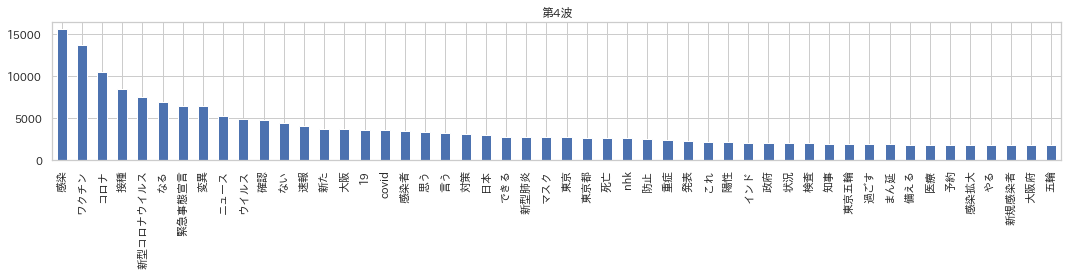

In [ ]:
n_top_words = 50

for i, dc in enumerate(dc_list):
    dc.sum(axis=0).sort_values(ascending=False)[0:n_top_words].plot.bar(figsize=(15, 4), grid=True)
    plt.title(f"第{i+1}波")
    plt.tight_layout()
    plt.show()

#### トピックモデル

In [ ]:
df_tfidf_1 = df_tfidf.iloc[df_all[df_all['period2'] == "第1波-中"]['index']]
df_tfidf_2 = df_tfidf.iloc[df_all[df_all['period2'] == "第2波-中"]['index']]
df_tfidf_3 = df_tfidf.iloc[df_all[df_all['period2'] == "第3波-中"]['index']]
df_tfidf_4 = df_tfidf.iloc[df_all[df_all['period2'] == "第4波-中"]['index']]

dt_list = [df_tfidf_1, df_tfidf_2, df_tfidf_3, df_tfidf_4]

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

font_path = !find / -name "*.ttf" | grep -s "ipaexg.ttf" | head -n 1
font_path

['/usr/local/lib/python3.7/dist-packages/japanize_matplotlib/fonts/ipaexg.ttf']

In [ ]:
def plot_lda(tfidf, n_top_words):

    lda = LDA(max_iter=25, learning_method='batch', random_state=0, n_jobs=-1, n_components=4)
    lda.fit(tfidf)

    words = count.get_feature_names()

    fig = plt.figure(figsize=(15,8))

    for topic_idx, topic in enumerate(lda.components_):
        print("\nTopic #", topic_idx, ":")
        long_string = ','.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(long_string)

        ax = fig.add_subplot(2, 2, topic_idx + 1)
        wordcloud = WordCloud(font_path=font_path[0], background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
        wordcloud.generate(long_string)
        ax.imshow(wordcloud)
        ax.set_title('Topic '+str(topic_idx))

    plt.tight_layout()
    plt.show()

In [ ]:
n_top_words = 500

for i, dt in enumerate(dt_list):
    print(f"第{i+1}波")
    plot_lda(dt, n_top_words)

Output hidden; open in https://colab.research.google.com to view.